<a href="https://colab.research.google.com/github/QaziSaim/NLP/blob/main/NLP_Operations_On_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install beautifulsoup4
!pip install requests

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [14]:
urls = [
    'https://www.interviewbit.com/sql-interview-questions/',
    'https://www.geeksforgeeks.org/sql-interview-questions/',
    # 'https://www.javatpoint.com/sql-interview-questions',
    'https://techtfq.com/blog/top-20-sql-interview-questions'
]


In [15]:
def extract_questions_from_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    questions = []

    for tag in soup.find_all(['p', 'li', 'h2', 'h3']):
        text = tag.get_text(strip=True)
        if '?' in text and len(text) < 200:  # filters very long text
            questions.append(text)
    return questions


In [16]:
all_questions = []
for url in urls:
    all_questions.extend(extract_questions_from_url(url))


In [17]:
unique_questions = list(set(all_questions))  # remove duplicates

df = pd.DataFrame({'SQL Interview Questions': unique_questions})
# df.to_excel('sql_questions.xlsx', index=False)


In [18]:
df.head()

,SQL Interview Questions
0,5. What is Collation? What are the different t...
1,50. What is the difference between clustered a...
2,What is MERGE statement?
3,25. What are the types of constraints in SQL?
4,21.What are Tables and Fields?


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [22]:
questions = df['SQL Interview Questions'].dropna().astype(str).tolist()

In [23]:
questions

['5. What is Collation? What are the different types of Collation Sensitivity?',
 '50. What is the difference between clustered and non-clustered indexes?',
 'What is MERGE statement?',
 '25. What are the types of constraints in SQL?',
 '21.What are Tables and Fields?',
 '35. What are the advantages of using stored procedures?',
 '44. What is the difference between ROW_NUMBER() and RANK()?',
 'What is the difference between RANK, DENSE_RANK and ROW_NUMBER window function?',
 '13. How can you delete a database in PostgreSQL?',
 '26. What is a cursor in SQL?',
 '71. What are the considerations for indexing very large tables?',
 '9. How do you define Indexes in PostgreSQL?',
 '42. What is the difference between the NVL and NVL2 functions?',
 '76. How does SQL handle recursive queries?',
 '46. What are window functions, and how are they used?',
 '1. What is Pattern Matching in SQL?',
 '18.How do you check the rows affected as part of previous transactions?',
 '1. What is PostgreSQL?',
 '38

In [24]:
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))  # 1-2 word phrases
X = vectorizer.fit_transform(questions)
sum_words = X.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)


In [25]:
top_words = words_freq[:10]
for word, freq in top_words:
    print(f"{word}: {freq}")


sql: 53
postgresql: 39
difference: 28
database: 19
statement: 16
used: 16
types: 15
query: 15
table: 14
different: 11


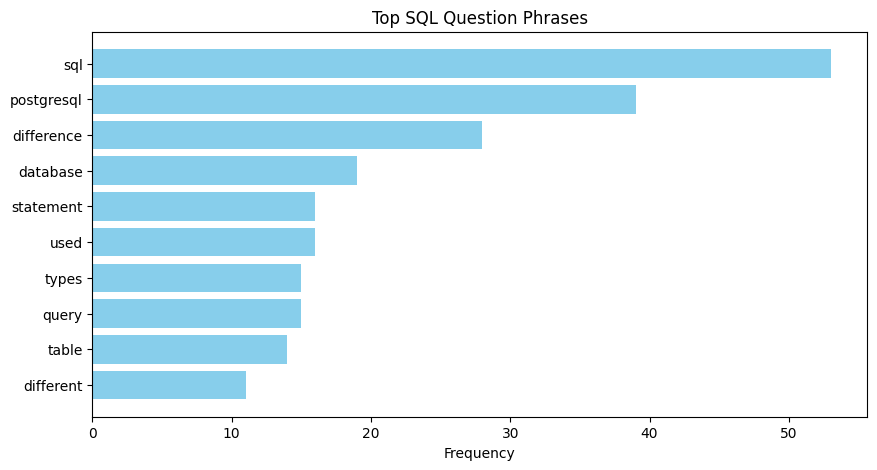

In [26]:
words = [w for w, _ in top_words]
freqs = [f for _, f in top_words]

plt.figure(figsize=(10, 5))
plt.barh(words, freqs, color='skyblue')
plt.xlabel("Frequency")
plt.title("Top SQL Question Phrases")
plt.gca().invert_yaxis()
plt.show()


In [27]:
!pip install sentence-transformers scikit-learn pandas openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [28]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Load questions
# df = pd.read_excel('sql_questions.xlsx')
questions = df['SQL Interview Questions'].dropna().astype(str).tolist()

# Load pre-trained embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode questions into vectors
embeddings = model.encode(questions)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [29]:
num_clusters = 8  # You can adjust based on the spread of your questions

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

# Add cluster labels to DataFrame
df['Cluster'] = labels


In [30]:
df.sort_values(by='Cluster', inplace=True)
df.to_excel('clustered_sql_questions.xlsx', index=False)
print("Clustered questions saved to 'clustered_sql_questions.xlsx'")


Clustered questions saved to 'clustered_sql_questions.xlsx'


In [31]:
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    sample = df[df['Cluster'] == i]['SQL Interview Questions'].head(3).tolist()
    for q in sample:
        print(f"  - {q}")



Cluster 0:
  - 35. What are the advantages of using stored procedures?
  - 77. What are the differences between transactional and analytical queries?
  - What is PRAGMA AUTONOMOUS TRANSACTION?

Cluster 1:
  - 9.How do you define Indexes in PostgreSQL?
  - 13. What is an Index? Explain its different types.
  - 9. What is denormalization, and when is it used?

Cluster 2:
  - 38. How does the CASE statement work in SQL?
  - 5. What is Collation? What are the different types of Collation Sensitivity?
  - What is MERGE statement?

Cluster 3:
  - 15. What is a Self-Join?
  - 34. What is a View?
  - 15. What is the difference between INNER JOIN and OUTER JOIN?

Cluster 4:
  - What allows us to define how various tables are related to each other formally in a database?
  - What kind of Experience do you want to share?
  - 19.What can you tell about WAL (Write Ahead Logging)?

Cluster 5:
  - 40. What is the purpose of the COALESCE function?
  - 22. What is the difference between SQL and MySQL?